# Kaustubh Dwivedi 


# Amazon Fake Review using NLP

 Reference From : https://github.com/aayush210789/Deception-Detection-on-Amazon-reviews-dataset


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [5]:
data = pd.read_csv(r"C:\Users\kaust\OneDrive\Desktop\amazon_reviews.txt", delimiter = "\t", encoding='latin1')
    

In [6]:

import csv                               
from sklearn.svm import LinearSVC
from random import shuffle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

from nltk.classify import SklearnClassifier
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaust\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [8]:
data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

In [9]:
len(data)

21000

In [10]:
cnt_srs=data.groupby(data["LABEL"]).PRODUCT_CATEGORY.value_counts()
cnt_srs[:5]


LABEL  PRODUCT_CATEGORY
0      Apparel             350
       Automotive          350
       Baby                350
       Beauty              350
       Books               350
Name: PRODUCT_CATEGORY, dtype: int64

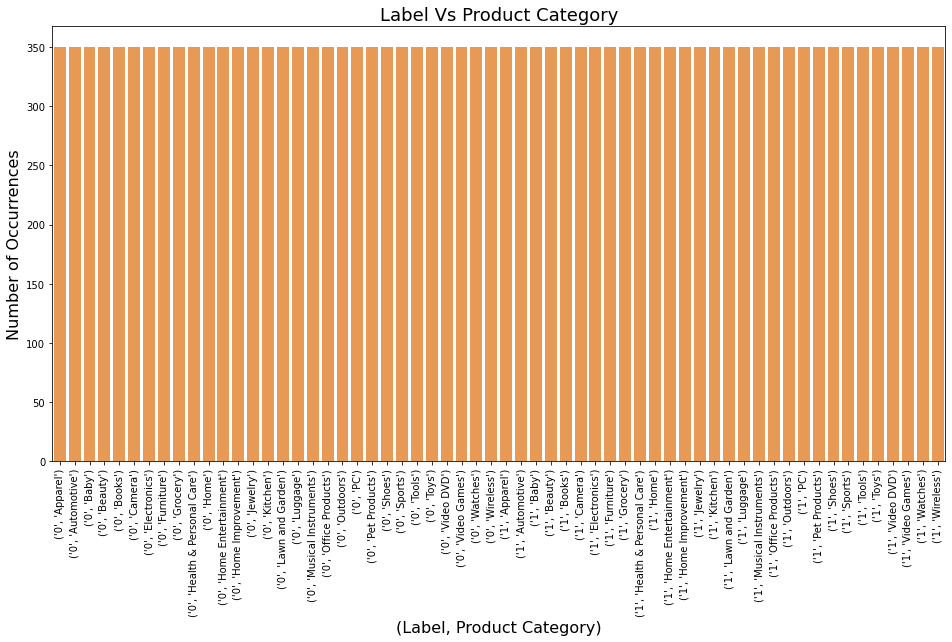

In [11]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Product Category)', fontsize=16)
plt.title('Label Vs Product Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [12]:
cnt_srs = data.groupby(data["LABEL"]).RATING.value_counts()
cnt_srs

LABEL  RATING
0      5         6151
       4         1974
       3          942
       1          868
       2          565
1      5         6059
       4         1999
       3          926
       1          889
       2          627
Name: RATING, dtype: int64

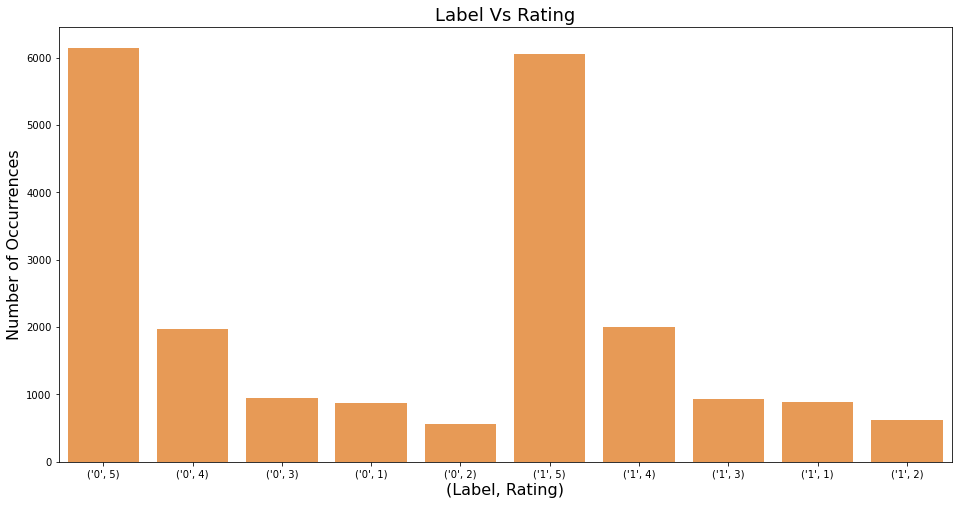

In [13]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Rating)', fontsize=16)
plt.title('Label Vs Rating', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [14]:
cnt_srs = data.groupby(data["RATING"]).PRODUCT_CATEGORY.value_counts()
cnt_srs

RATING  PRODUCT_CATEGORY  
1       Wireless              103
        Office Products        91
        PC                     84
        Lawn and Garden        77
        Electronics            74
                             ... 
5       Watches               375
        Shoes                 371
        Home Entertainment    359
        Wireless              357
        Furniture             342
Name: PRODUCT_CATEGORY, Length: 150, dtype: int64

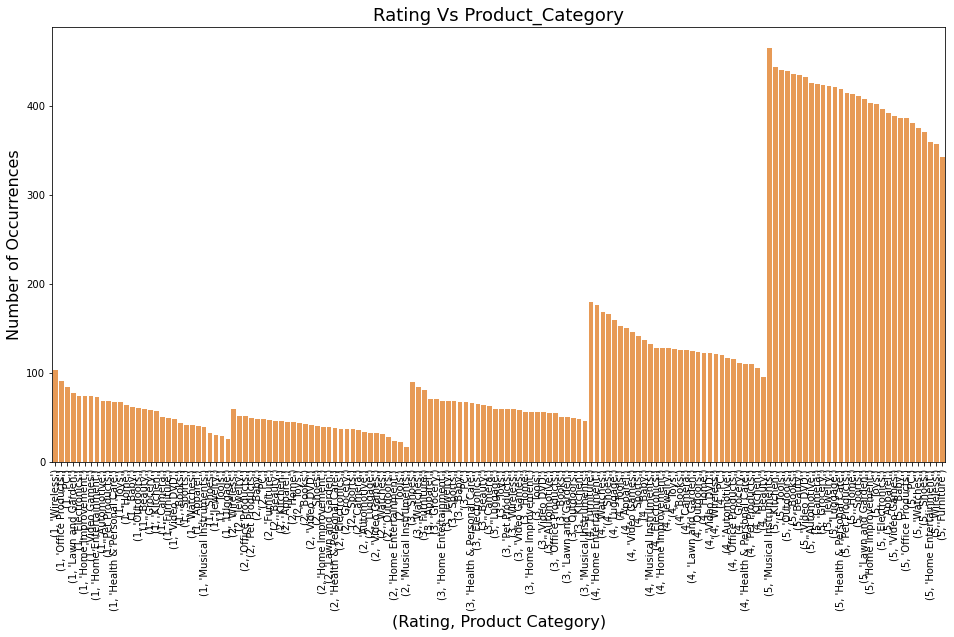

In [15]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Rating, Product Category)', fontsize=16)
plt.title('Rating Vs Product_Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [16]:
cnt_srs = data.groupby("VERIFIED_PURCHASE").LABEL.value_counts()
cnt_srs

VERIFIED_PURCHASE  LABEL
N                  1        7623
                   0        1679
Y                  0        8821
                   1        2877
Name: LABEL, dtype: int64

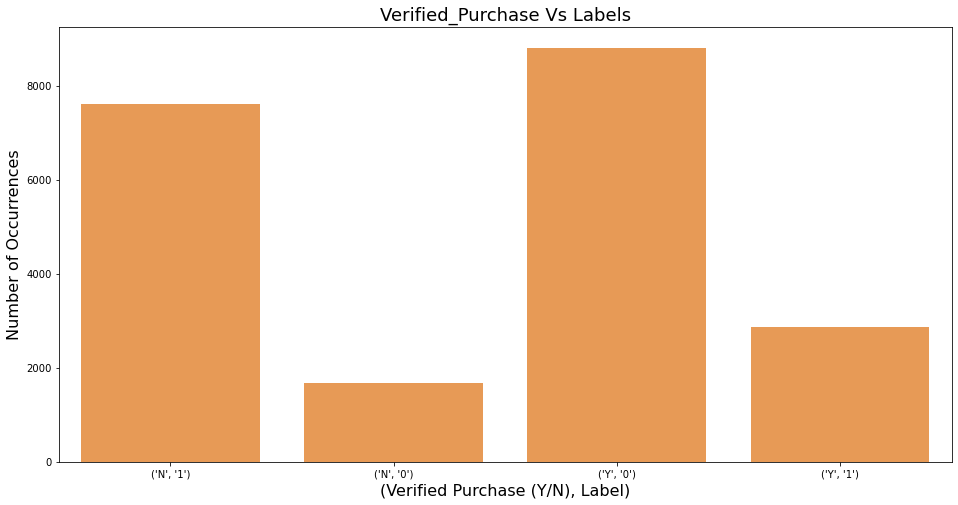

In [17]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Verified Purchase (Y/N), Label)', fontsize=16)
plt.title('Verified_Purchase Vs Labels', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()


In [18]:
df1 = data.groupby("LABEL").REVIEW_TEXT

In [19]:
data['TEXT_LENGTH'] = data['REVIEW_TEXT'].apply(len)

In [20]:
cnt_srs = data.groupby(["LABEL"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    428.067333
1    316.539238
Name: TEXT_LENGTH, dtype: float64

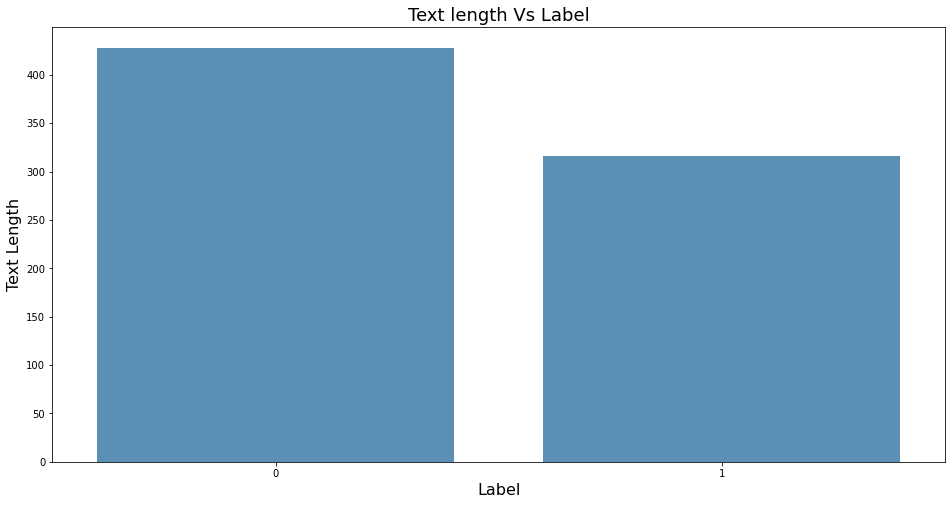

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Text Length', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Text length Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [22]:
data['num_sentences'] = data['REVIEW_TEXT'].apply(lambda x: len(str(x).split('.')))
data[:5]

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4


In [23]:
from textstat.textstat import textstat
data["FK_Score"] = data["REVIEW_TEXT"].apply(textstat.flesch_kincaid_grade)

In [24]:
cnt_srs = data.groupby(["LABEL"]).FK_Score.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    13.800886
1     8.006438
Name: FK_Score, dtype: float64

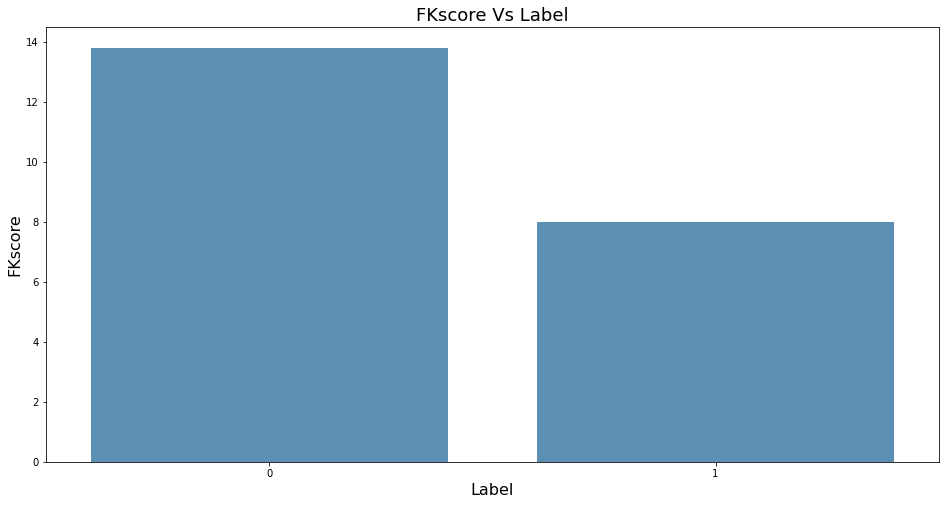

In [25]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('FKscore', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('FKscore Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [26]:
import nltk
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [27]:
def stopCount(x):
    sum =0
    for char in x.split():
        sum+= char in stop_words
    return sum
data['stop_count'] = data['REVIEW_TEXT'].apply(stopCount)


In [28]:
cnt_srs = data.groupby(["LABEL"]).stop_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    32.516952
1    24.696381
Name: stop_count, dtype: float64

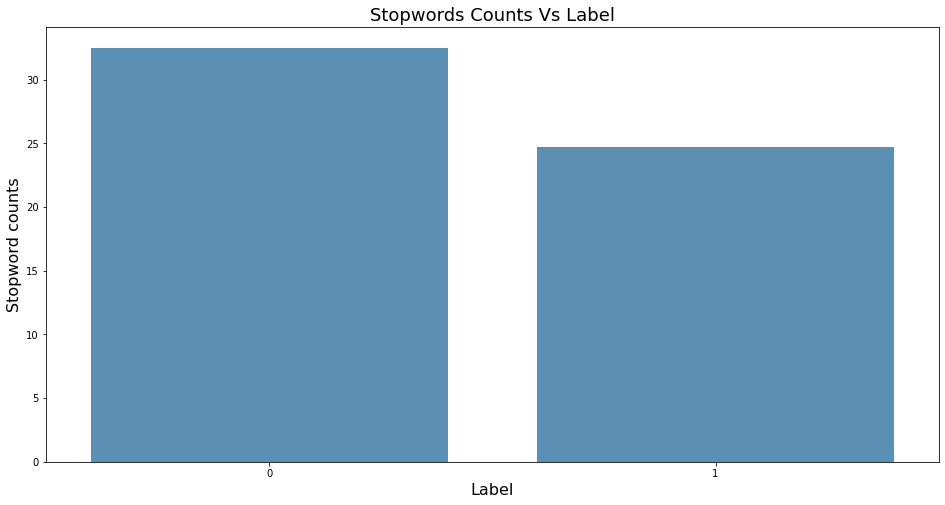

In [29]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Stopword counts', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Stopwords Counts Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [30]:
def capsCount(x):
    sum =0
    for char in x:
        sum+= char in "QWERTYUIOPASDFGHJKLZXCVBNM"
    return sum
data['caps_count'] = data['REVIEW_TEXT'].apply(capsCount)

In [31]:
cnt_srs = data.groupby(["LABEL"]).caps_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    12.099333
1     8.712571
Name: caps_count, dtype: float64

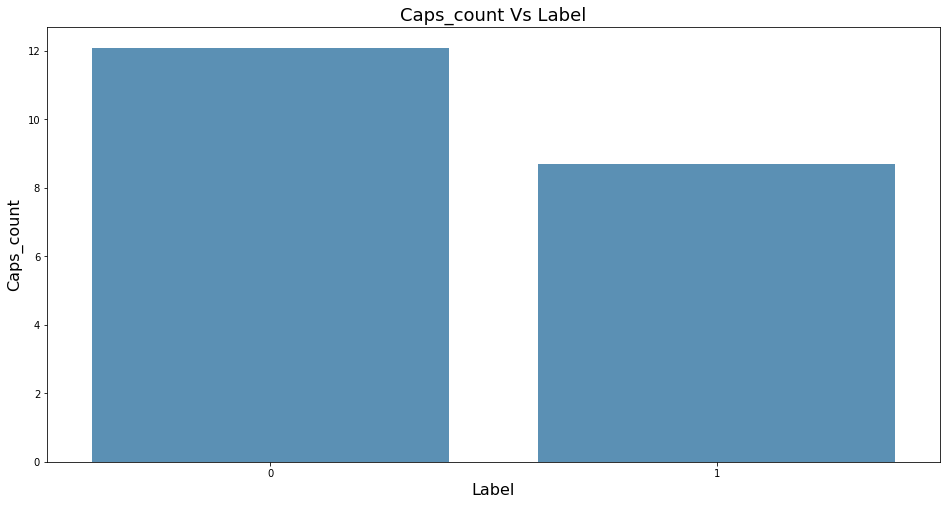

In [32]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Caps_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Caps_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [33]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
def punctCount(x):
    return count(x, set(string.punctuation))
data['punct_count'] = data['REVIEW_TEXT'].apply(punctCount)

In [34]:
cnt_srs = data.groupby(["LABEL"]).punct_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    15.578857
1    10.184762
Name: punct_count, dtype: float64

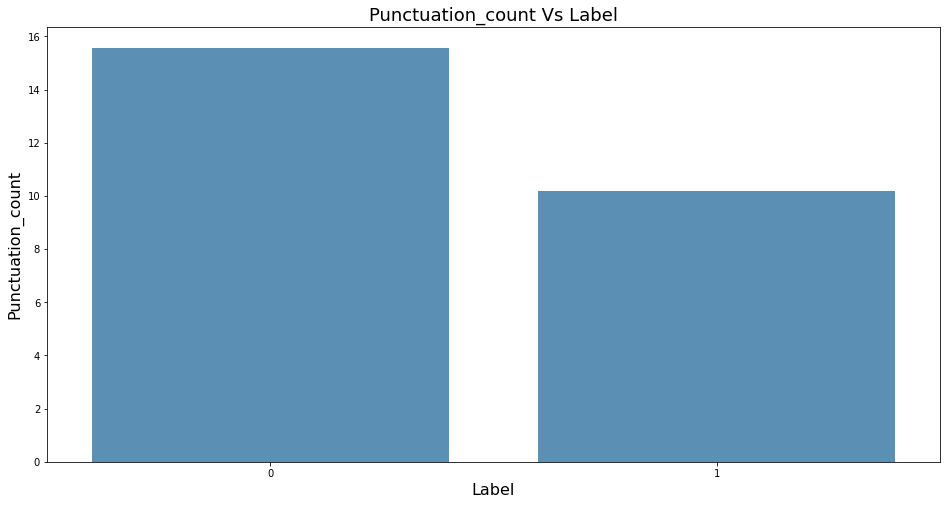

In [35]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Punctuation_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Punctuation_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [36]:
import re
import string
match_list = []

def checkName(title,text):
    matches = []
    for word in title.split():
        #removing punctuation
        word = "".join((char for char in word if char not in string.punctuation))
        #print(word)
        myreg = r'\b'+word+r'\b'
        r = re.compile(myreg, flags=re.I | re.X)
        matches.append(r.findall(text))
    return len(matches)
        

for a,b in zip(data.PRODUCT_TITLE, data.REVIEW_TEXT):
    number_of_matches = checkName(a,b)
    match_list.append(number_of_matches)
    
data["matchesDf"] = match_list

In [37]:
cnt_srs = data.groupby(["LABEL"]).matchesDf.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    10.570476
1    13.823048
Name: matchesDf, dtype: float64

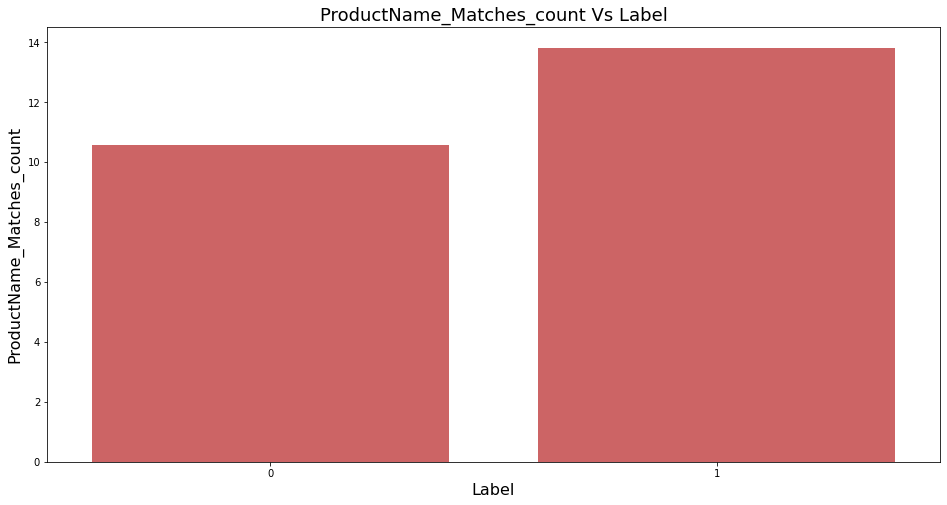

In [38]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.ylabel('ProductName_Matches_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('ProductName_Matches_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [39]:
data["emojis"] = data["REVIEW_TEXT"].apply(lambda x: 1 if ";)" in x.split() or ":)" in x.split() or ":-)" in x.split() else 0)


In [40]:
cnt_srs = data.groupby(["LABEL"]).emojis.agg(lambda x: sum(x))
cnt_srs


LABEL
0    107
1     85
Name: emojis, dtype: int64

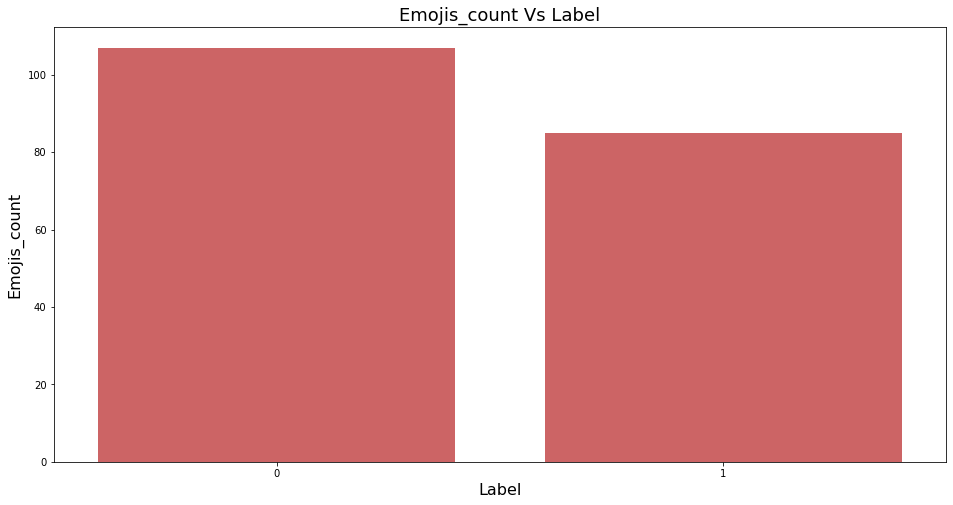

In [41]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.ylabel('Emojis_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Emojis_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [42]:
data.loc[data["RATING"] < 3, "RATING"] = 0
data.loc[data["RATING"] > 3, "RATING"] = 1

In [43]:
data.RATING.value_counts()


1    16183
0     2949
3     1868
Name: RATING, dtype: int64

In [44]:
data1 = data.loc[data['RATING'] == 1]
print(len(data1))
data2 = data1.sample(frac=0.2, replace=True)
print(len(data2))
data3 = data1 = data.loc[data['RATING'] == 0]

16183
3237


In [45]:
data4 = pd.concat([data2, data3], ignore_index=True)
data4[:5]

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score,stop_count,caps_count,punct_count,matchesDf,emojis
0,5133,1,1,Y,Grocery,B00KCCKV8W,"Hula Delights Deluxe Roasted Nuts Gift Basket,...",yummyyyy....:),this box contains a lots of happiness..<br />t...,251,10,18.1,20,0,23,8,0
1,17608,0,1,Y,Sports,B00HOQL8CC,HiLight P5C Sub-Compact 400 lumen Tactical Pis...,One Star,On the 5th shot it fell off of my Glock 22. Wh...,250,5,6.1,19,8,5,11,0
2,18407,0,1,Y,Furniture,B0039O5JYQ,Florenz Wall Mount Wine Rack Sculpture,"Beautiful, functional piece!",The paint on this item is very rich even thoug...,225,4,16.5,16,3,7,6,0
3,17645,0,1,Y,Luggage,B005UNECNS,Maxwell Scott Luxury Black Leather Bag Strap -...,I highly recommend this very dependable strap ...,I highly recommend this item. The price on thi...,1961,17,13.2,171,36,70,10,0
4,3829,1,1,N,Home Entertainment,B0078GCLRY,Panasonic SC-BTT190 Energy Star 5.1-Channel 10...,Great for the price,"At the price I got this, I surely can't compla...",305,7,4.3,22,8,8,15,0


In [46]:
rawData = data4[["REVIEW_TEXT", "RATING"]]
rawData = [tuple(x) for x in rawData.values]

In [47]:
rawData[:5]

[("this box contains a lots of happiness..<br />this is the universal gift for everyone because everyone loves it..<br />and the best thing is u don't need to worry about the price,<br />because it is so much in such a low price...<br />order and enjoy..",
  1),
 ("On the 5th shot it fell off of my Glock 22. When I tried to put it back on I discovered the screw that tightensit to the rail had pulled the threads. After 2 calls to the manufacturer and various promises I have received nothing from them. Don't buy.",
  1),
 ('The paint on this item is very rich even though the colors are muted.  It is lightweight, does what it is supposed to, and installed (fairly) easily.  Looks absolutely beautiful and frees up space the bottles used to take up.',
  1),
 ('I highly recommend this item. The price on this may have gone up some, I bought one some time ago. This is a VERY GOOD strap. One of the frequent problems with such items is that the metal is often a very low quality, planned obsolesce

In [48]:
def splitData(percentage):
    dataSamples = len(rawData)
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (_, Text, Label) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(preProcess(Text)),Label))
    for (_, Text, Label) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(preProcess(Text)),Label))

In [49]:
def loadData(path, Text=None):
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        next(reader)
        for line in reader:
            (Id, Text, Label) = parseReview(line)
            rawData.append((Id, Text, Label))
            preprocessedData.append((Id, preProcess(Text), Label))
        

In [50]:
def parseReview(reviewLine):
    s=""
    if reviewLine[1]=="__label1__":
        s = "fake"
    else: 
        s = "real"
    return (reviewLine[0], reviewLine[8], s)


In [51]:
def preProcess(text):
    return word_tokenize(text)

In [52]:
featureDict = {} 

def toFeatureVector(tokens):
    localDict = {}
    for token in tokens:
        if token not in featureDict:
            featureDict[token] = 1
        else:
            featureDict[token] = +1
   
        if token not in localDict:
            localDict[token] = 1
        else:
            localDict[token] = +1
    
    return localDict

In [53]:
def trainClassifier(trainData):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(trainData)

In [54]:
def crossValidate(dataset, folds):
    shuffle(dataset)
    cv_results = []
    foldSize = int(len(dataset)/folds)
    for i in range(0,len(dataset),foldSize):
        classifier = trainClassifier(dataset[:i]+dataset[foldSize+i:])
        y_pred = predictLabels(dataset[i:i+foldSize],classifier)
        a = accuracy_score(list(map(lambda d : d[1], dataset[i:i+foldSize])), y_pred)
        (p,r,f,_) = precision_recall_fscore_support(list(map(lambda d : d[1], dataset[i:i+foldSize])), y_pred, average ='macro')
        print(a,p,r,f)
        cv_results.append((a,p,r,f))
    cv_results = (np.mean(np.array(cv_results),axis=0))
    return cv_results

In [55]:

def predictLabels(reviewSamples, classifier):
    return classifier.classify_many(map(lambda t: t[0], reviewSamples))

def predictLabel(reviewSample, classifier):
    return classifier.classify(toFeatureVector(preProcess(reviewSample)))

In [56]:
rawData = []         
preprocessedData = [] 
trainData = []        
testData = []         

fakeLabel = 'fake'
realLabel = 'real'

reviewPath = r'C:\Users\kaust\OneDrive\Desktop\amazon_reviews.txt'

print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing the dataset...",sep='\n')
loadData(reviewPath) 

print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.75)

print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10))

Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 21000 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 21000 rawData, 15750 trainData, 5250 testData
Training Samples: 
15750
Features: 
52916
Training Classifier...
0.5923809523809523 0.5924857774968395 0.5926830568950138 0.5922019281026772
Training Classifier...
0.6266666666666667 0.6263429932051803 0.6264531504301325 0.6263616557734205
Training Classifier...
0.6031746031746031 0.6029688348284687 0.6027944369348298 0.6027742749054225
Training Classifier...


C:\Users\kaust\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6317460317460317 0.6320906432748538 0.6311481491039057 0.6308172054135495
Training Classifier...
0.633015873015873 0.6337072018890201 0.6329443976818661 0.6324645605966157
Training Classifier...
0.594920634920635 0.5947979592627013 0.5947600415467789 0.5947636453971183
Training Classifier...
0.6292063492063492 0.6288000077468835 0.6288424281562803 0.6288171543132755
Training Classifier...
0.6203174603174603 0.6208318935031634 0.6207032547996116 0.6202830188679245
Training Classifier...
0.6044444444444445 0.6049473323461516 0.6046927914852442 0.6042810919982691
Training Classifier...
0.5904761904761905 0.5910708696479912 0.591216565614779 0.5904226946648814
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [0.61263492 0.61280435 0.61262383 0.61231872]


In [57]:
trainData[1]

({'it': 1,
  'seems': 1,
  'like': 1,
  'every': 1,
  'time': 1,
  'we': 1,
  'get': 1,
  'a': 1,
  'pillow': 1,
  'for': 1,
  'my': 1,
  'border': 1,
  'collie': 1,
  'she': 1,
  'tears/chews': 1,
  'up': 1,
  '.': 1,
  'This': 1,
  'mat': 1,
  'has': 1,
  "n't": 1,
  'tore': 1,
  'It': 1,
  'is': 1,
  'very': 1,
  'durable': 1,
  'and': 1,
  'strong': 1,
  ',': 1,
  'plus': 1,
  'soft': 1,
  'enough': 1,
  'to': 1,
  'ease': 1,
  'older': 1,
  'dogs': 1,
  'cats': 1,
  'My': 1,
  'dog': 1,
  'have': 1,
  'trouble': 1,
  'walking': 1,
  'probably': 1,
  'due': 1,
  'arthritis': 1,
  'be': 1,
  'helping': 1,
  'lot': 1,
  'If': 1,
  'i': 1,
  'another': 1,
  "'ll": 1,
  'definitely': 1,
  'buy': 1,
  'one': 1},
 'fake')

In [58]:
testData[1]

({'My': 1,
  'husband': 1,
  'was': 1,
  'very': 1,
  'surprised': 1,
  'when': 1,
  'he': 1,
  'open': 1,
  'the': 1,
  'tent': 1,
  '.': 1,
  'He': 1,
  'loves': 1,
  'to': 1,
  'go': 1,
  'camping': 1,
  'and': 1,
  'fishing': 1,
  'in': 1,
  'night': 1,
  'time': 1,
  'So': 1,
  'it': 1,
  'is': 1,
  'perfect': 1,
  'for': 1,
  'him': 1},
 'fake')

In [59]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
import string


In [60]:
table = str.maketrans({key: None for key in string.punctuation})

def preProcess(text):
    lemmatizer = WordNetLemmatizer()
    filtered_tokens=[]
    stop_words = set(stopwords.words('english'))
    text = text.translate(table)
    for w in text.split(" "):
        if w not in stop_words:
            filtered_tokens.append(lemmatizer.lemmatize(w.lower()))
    return filtered_tokens

In [61]:

rawData = []         
preprocessedData = [] 
trainData = []        
testData = []         

fakeLabel = 'fake'
realLabel = 'real'

reviewPath = r'C:\Users\kaust\OneDrive\Desktop\amazon_reviews.txt'


print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing the dataset...",sep='\n')
loadData(reviewPath) 

print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.75)

print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10))

Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 21000 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 21000 rawData, 15750 trainData, 5250 testData
Training Samples: 
15750
Features: 
73003
Training Classifier...
0.6152380952380953 0.615236138703269 0.6152342805174198 0.6152342175280174
Training Classifier...
0.6526984126984127 0.6519596750469552 0.6519051666192704 0.651930045423528
Training Classifier...
0.6253968253968254 0.6255039639790738 0.6255262317452022 0.6253930500685319
Training Classifier...
0.6158730158730159 0.6163081581138921 0.6162619988706945 0.6158674411601439
Training Classifier...
0.6419047619047619 0.6419259075311541 0.6419327736512963 0.6419034626883
Training Classifier...
0.6298412698412699 0.6298010404337183 0.6298177877125246 0.6298030655922566
Training Classifier...
0.6215873015873016 0.6221119685003734 0.6218311562651185 0.621440646797308
Training Classifier...
0.6228571428571429 0.6236193032094322 0.623161586840832

In [62]:
table = str.maketrans({key: None for key in string.punctuation})
def preProcess(text):
    lemmatizer = WordNetLemmatizer()
    filtered_tokens=[]
    lemmatized_tokens = []
    stop_words = set(stopwords.words('english'))
    text = text.translate(table)
    for w in text.split(" "):
        if w not in stop_words:
            lemmatized_tokens.append(lemmatizer.lemmatize(w.lower()))
        filtered_tokens = [' '.join(l) for l in nltk.bigrams(lemmatized_tokens)] + lemmatized_tokens
    return filtered_tokens

In [63]:
def trainClassifier(trainData):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC(C=0.01))])
    return SklearnClassifier(pipeline).train(trainData)

In [64]:
rawData = []          
preprocessedData = [] 
trainData = []        
testData = []        

fakeLabel = 'fake'
realLabel = 'real'

reviewPath = r'C:\Users\kaust\OneDrive\Desktop\amazon_reviews.txt'

print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing the dataset...",sep='\n')
loadData(reviewPath) 

print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.75)

print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10))

Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 21000 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 21000 rawData, 15750 trainData, 5250 testData
Training Samples: 
15750
Features: 
542738
Training Classifier...
0.6787301587301587 0.6791833676234524 0.6789308176100628 0.6786616324529373
Training Classifier...
0.686984126984127 0.6888769964615956 0.6869521539741614 0.6861744586688762
Training Classifier...
0.6907936507936508 0.6925721945391496 0.6920126681581776 0.6907218365443586
Training Classifier...
0.6958730158730159 0.6974589364124248 0.6957860466916281 0.6952001677474771
Training Classifier...
0.6971428571428572 0.6975587951472824 0.6974880467676265 0.6971384618733696
Training Classifier...
0.6907936507936508 0.6925018318000489 0.6906393614448118 0.6899938364538392
Training Classifier...
0.6971428571428572 0.6995398156648904 0.6969644440861082 0.6961059575003408
Training Classifier...
0.6806349206349206 0.6827460758665795 0.680233533

In [65]:
def loadData(path, Text=None):
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        next(reader)
        for line in reader:
            (Id, Rating, verified_Purchase, product_Category, Text, Label) = parseReview(line)
            rawData.append((Id, Rating, verified_Purchase, product_Category, Text, Label))
            preprocessedData.append((Id, preProcess(Text), Label))
        
def splitData(percentage):
    dataSamples = len(rawData)
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (_, Rating, verified_Purchase, product_Category, Text, Label) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(Rating, verified_Purchase, product_Category, preProcess(Text)),Label))
    for (_, Rating, verified_Purchase, product_Category, Text, Label) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(Rating, verified_Purchase, product_Category, preProcess(Text)),Label))

In [66]:
def parseReview(reviewLine):
    s=""
    if reviewLine[1]=="__label1__":
        s = "fake"
    else: 
        s = "real"
    return (reviewLine[0], reviewLine[2], reviewLine[3],reviewLine[4], reviewLine[8], s)

In [67]:
table = str.maketrans({key: None for key in string.punctuation})
def preProcess(text):
    lemmatizer = WordNetLemmatizer()
    filtered_tokens=[]
    lemmatized_tokens = []
    stop_words = set(stopwords.words('english'))
    text = text.translate(table)
    for w in text.split(" "):
        if w not in stop_words:
            lemmatized_tokens.append(lemmatizer.lemmatize(w.lower()))
        filtered_tokens = [' '.join(l) for l in nltk.bigrams(lemmatized_tokens)] + lemmatized_tokens
    return filtered_tokens

In [68]:
featureDict = {}

def toFeatureVector(Rating, verified_Purchase, product_Category, tokens):
    localDict = {}

    print("Rating: ",Rating)
    featureDict["R"] = 1   
    localDict["R"] = Rating

  
    featureDict["VP"] = 1
            
    if verified_Purchase == "N":
        localDict["VP"] = 0
    else:
        localDict["VP"] = 1


    
    if product_Category not in featureDict:
        featureDict[product_Category] = 1
    else:
        featureDict[product_Category] = +1
            
    if product_Category not in localDict:
        localDict[product_Category] = 1
    else:
        localDict[product_Category] = +1
            
            
        

    for token in tokens:
        if token not in featureDict:
            featureDict[token] = 1
        else:
            featureDict[token] = +1
            
        if token not in localDict:
            localDict[token] = 1
        else:
            localDict[token] = +1
    
    return localDict

In [69]:
rawData = []          
preprocessedData = [] 
trainData = []       
testData = []       

fakeLabel = 'fake'
realLabel = 'real'

reviewPath = r'C:\Users\kaust\OneDrive\Desktop\amazon_reviews.txt'


print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing the dataset...",sep='\n')
loadData(reviewPath) 

print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.75)

print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10))

Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 21000 rawData, 0 trainData, 0 testData
Preparing training and test data...
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  1
Rating:  1
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  2
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  1
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  1
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  1
Rating:  4
Rating:  3
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  1
Rating:  1
Rating:  4
Rating:  1
Rating:  1
Rating:  3
Rating:  4
Rating:  1
Rating:  4
Rating:  2
Rating:  4
Rating:  4
Rating:  1
Rating:  4
Rating:  1
Rating:  2
Rating:  4
Rating:  1
Rating:  1
Rating:  4
Rating:  4

Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  3
Rating:  3
Rating:  3
Rating:  4
Rating:  2
Rating:  4
Rating:  1
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  1
Rating:  4
Rating:  4
Rating:  1
Rating:  4
Rating:  3
Rating:  2
Rating:  4
Rating:  3
Rating:  2
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  2
Rating:  1
Rating:  3
Rating:  4
Rating:  1
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  1
Rating:  3
Rating:  2
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  3
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  2
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  1
Rating:  3
Rating:  2
Rating:  3
Rating:  3
Rating:  4
Rating:  2
Rating:  4
Rating:  4

Rating:  4
Rating:  4
Rating:  1
Rating:  3
Rating:  3
Rating:  1
Rating:  1
Rating:  4
Rating:  3
Rating:  2
Rating:  2
Rating:  3
Rating:  4
Rating:  2
Rating:  4
Rating:  4
Rating:  4
Rating:  2
Rating:  4
Rating:  4
Rating:  4
Rating:  1
Rating:  3
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  3
Rating:  1
Rating:  4
Rating:  3
Rating:  4
Rating:  1
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  1
Rating:  3
Rating:  4
Rating:  4
Rating:  1
Rating:  1
Rating:  3
Rating:  3
Rating:  2
Rating:  4
Rating:  2
Rating:  2
Rating:  3
Rating:  3
Rating:  4
Rating:  2
Rating:  4
Rating:  4
Rating:  2
Rating:  3
Rating:  1
Rating:  3
Rating:  2
Rating:  4
Rating:  4
Rating:  1
Rating:  4
Rating:  4
Rating:  1
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  1
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  3
Rating:  2
Rating:  3
Rating:  4
Rating:  2
Rating:  1
Rating:  4
Rating:  1
Rating:  1
Rating:  4

Rating:  3
Rating:  1
Rating:  4
Rating:  2
Rating:  2
Rating:  2
Rating:  4
Rating:  1
Rating:  4
Rating:  3
Rating:  2
Rating:  2
Rating:  4
Rating:  1
Rating:  4
Rating:  4
Rating:  4
Rating:  1
Rating:  1
Rating:  3
Rating:  2
Rating:  3
Rating:  3
Rating:  3
Rating:  1
Rating:  3
Rating:  4
Rating:  4
Rating:  3
Rating:  4
Rating:  1
Rating:  2
Rating:  1
Rating:  3
Rating:  4
Rating:  2
Rating:  3
Rating:  4
Rating:  4
Rating:  3
Rating:  2
Rating:  4
Rating:  3
Rating:  2
Rating:  3
Rating:  4
Rating:  4
Rating:  3
Rating:  1
Rating:  1
Rating:  2
Rating:  4
Rating:  3
Rating:  4
Rating:  1
Rating:  4
Rating:  1
Rating:  2
Rating:  4
Rating:  2
Rating:  4
Rating:  3
Rating:  3
Rating:  4
Rating:  3
Rating:  1
Rating:  1
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  1
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  3
Rating:  2
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  2
Rating:  2
Rating:  4
Rating:  4
Rating:  4

Rating:  4
Rating:  1
Rating:  4
Rating:  1
Rating:  4
Rating:  2
Rating:  1
Rating:  1
Rating:  1
Rating:  4
Rating:  3
Rating:  4
Rating:  4
Rating:  1
Rating:  4
Rating:  1
Rating:  4
Rating:  3
Rating:  4
Rating:  2
Rating:  1
Rating:  1
Rating:  2
Rating:  1
Rating:  3
Rating:  4
Rating:  1
Rating:  1
Rating:  2
Rating:  4
Rating:  3
Rating:  3
Rating:  4
Rating:  1
Rating:  2
Rating:  2
Rating:  3
Rating:  4
Rating:  4
Rating:  2
Rating:  2
Rating:  3
Rating:  3
Rating:  3
Rating:  1
Rating:  3
Rating:  1
Rating:  1
Rating:  4
Rating:  1
Rating:  2
Rating:  1
Rating:  1
Rating:  1
Rating:  2
Rating:  4
Rating:  4
Rating:  3
Rating:  3
Rating:  1
Rating:  3
Rating:  3
Rating:  1
Rating:  4
Rating:  1
Rating:  4
Rating:  4
Rating:  1
Rating:  1
Rating:  4
Rating:  1
Rating:  3
Rating:  3
Rating:  2
Rating:  1
Rating:  1
Rating:  3
Rating:  1
Rating:  4
Rating:  4
Rating:  4
Rating:  1
Rating:  4
Rating:  1
Rating:  4
Rating:  1
Rating:  4
Rating:  1
Rating:  2
Rating:  3
Rating:  2

Rating:  2
Rating:  1
Rating:  2
Rating:  3
Rating:  3
Rating:  1
Rating:  1
Rating:  2
Rating:  3
Rating:  3
Rating:  1
Rating:  2
Rating:  3
Rating:  2
Rating:  2
Rating:  3
Rating:  2
Rating:  2
Rating:  2
Rating:  2
Rating:  1
Rating:  1
Rating:  1
Rating:  1
Rating:  2
Rating:  1
Rating:  2
Rating:  1
Rating:  1
Rating:  1
Rating:  2
Rating:  1
Rating:  1
Rating:  1
Rating:  2
Rating:  2
Rating:  2
Rating:  2
Rating:  1
Rating:  1
Rating:  2
Rating:  2
Rating:  2
Rating:  3
Rating:  1
Rating:  2
Rating:  1
Rating:  2
Rating:  2
Rating:  2
Rating:  2
Rating:  2
Rating:  2
Rating:  2
Rating:  2
Rating:  2
Rating:  1
Rating:  3
Rating:  2
Rating:  2
Rating:  2
Rating:  1
Rating:  1
Rating:  2
Rating:  2
Rating:  2
Rating:  2
Rating:  2
Rating:  1
Rating:  1
Rating:  1
Rating:  3
Rating:  1
Rating:  2
Rating:  2
Rating:  2
Rating:  2
Rating:  1
Rating:  1
Rating:  2
Rating:  1
Rating:  2
Rating:  2
Rating:  1
Rating:  2
Rating:  1
Rating:  1
Rating:  1
Rating:  2
Rating:  2
Rating:  2

Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5

Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5

Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5

Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5

Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  2
Rating:  4
Rating:  4
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  2
Rating:  5
Rating:  5
Rating:  4
Rating:  3
Rating:  3
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  4
Rating:  5
Rating:  2
Rating:  2
Rating:  2
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  4

Rating:  5
Rating:  5
Rating:  3
Rating:  4
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  1
Rating:  1
Rating:  3
Rating:  1
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  4
Rating:  2
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  3
Rating:  2
Rating:  3
Rating:  5
Rating:  5
Rating:  1
Rating:  4
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  1
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  3
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  4
Rating:  5
Rating:  2
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4

Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  4
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  3
Rating:  4
Rating:  3
Rating:  5
Rating:  4
Rating:  5
Rating:  1
Rating:  5
Rating:  2
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  4
Rating:  5
Rating:  1
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  4
Rating:  5
Rating:  4
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  4
Rating:  3
Rating:  4
Rating:  3
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  2
Rating:  5
Rating:  4
Rating:  1
Rating:  5
Rating:  5
Rating:  2
Rating:  3
Rating:  4

Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  4
Rating:  4
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  1
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  1
Rating:  4
Rating:  5
Rating:  3
Rating:  2
Rating:  5
Rating:  4
Rating:  1
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  4
Rating:  5
Rating:  3
Rating:  5
Rating:  4
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  1
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  4
Rating:  5
Rating:  4
Rating:  5
Rating:  1
Rating:  4
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  5

Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  4
Rating:  5
Rating:  3
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  1
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  3
Rating:  5
Rating:  5
Rating:  3
Rating:  2
Rating:  5
Rating:  3
Rating:  4
Rating:  2
Rating:  4
Rating:  4
Rating:  5
Rating:  1
Rating:  1
Rating:  2
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5

Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  2
Rating:  3
Rating:  5
Rating:  4
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  3
Rating:  4
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  1
Rating:  5
Rating:  4
Rating:  1
Rating:  3
Rating:  5
Rating:  4
Rating:  3
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  4
Rating:  5
Rating:  5
Rating:  2
Rating:  4
Rating:  5
Rating:  3
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5

Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  3
Rating:  3
Rating:  3
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  3
Rating:  1
Rating:  1
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  2
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  3
Rating:  4
Rating:  5
Rating:  5
Rating:  1
Rating:  1
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  4
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  4

Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  1
Rating:  1
Rating:  4
Rating:  4
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  1
Rating:  4
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  4
Rating:  3
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  3
Rating:  5
Rating:  3
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  3
Rating:  5
Rating:  2
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  5
Rating:  1
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  4
Rating:  3
Rating:  2
Rating:  4
Rating:  1

Rating:  5
Rating:  3
Rating:  1
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  1
Rating:  1
Rating:  5
Rating:  5
Rating:  3
Rating:  2
Rating:  3
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  4
Rating:  5
Rating:  3
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  4
Rating:  1
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  3
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  4
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  3

Rating:  5
Rating:  3
Rating:  4
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  5
Rating:  4
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  3
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  3
Rating:  5
Rating:  1
Rating:  2
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  1
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  1
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  1
Rating:  3
Rating:  4

Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5

Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5

Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  3
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  4
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5

Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  3
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5

Rating:  3
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  4
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  3
Rating:  3
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  5
Rating:  3
Rating:  1
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  3
Rating:  5
Rating:  5
Rating:  1
Rating:  1
Rating:  4
Rating:  3
Rating:  5
Rating:  3
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  4
Rating:  2
Rating:  4

Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  1
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  3
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  4
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  3
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  5
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  5
Rating:  1
Rating:  5
Rating:  3
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  1
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  2
Rating:  2
Rating:  3
Rating:  1
Rating:  4
Rating:  4
Rating:  1
Rating:  1
Rating:  4
Rating:  3
Rating:  2
Rating:  4
Rating:  3
Rating:  4

Rating:  5
Rating:  4
Rating:  1
Rating:  4
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  4
Rating:  1
Rating:  1
Rating:  5
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  4
Rating:  5
Rating:  2
Rating:  4
Rating:  4
Rating:  5
Rating:  5
Rating:  5
Rating:  4
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  1
Rating:  5
Rating:  1
Rating:  5
Rating:  3
Rating:  5
Rating:  1
Rating:  2
Rating:  2
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  1
Rating:  4
Rating:  3
Rating:  4
Rating:  5
Rating:  5
Rating:  1
Rating:  4
Rating:  1
Rating:  2
Rating:  5
Rating:  5
Rating:  1
Rating:  1
Rating:  5
Rating:  5
Rating:  5
Rating:  5
Rating:  3
Rating:  4
Rating:  4
Rating:  1
Rating:  5
Rating:  1
Rating:  5
Rating:  4
Rating:  2
Rating:  5
Rating:  1
Rating:  3
Rating:  2

In [70]:
classifier = trainClassifier(trainData)
predictions = predictLabels(testData, classifier)
true_labels = list(map(lambda d: d[1], testData))
a = accuracy_score(true_labels, predictions)
p, r, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
print("accuracy: ", a)
print("Precision: ", p)
print("Recall: ", a)
print("f1-score: ", f1)

Training Classifier...
accuracy:  0.8019047619047619
Precision:  0.8060089061692572
Recall:  0.8019047619047619
f1-score:  0.8012383216593003


In [71]:
classifier

<SklearnClassifier(Pipeline(steps=[('svc', LinearSVC(C=0.01))]))>

In [72]:
print(crossValidate(trainData,5))

Training Classifier...
0.8073015873015873 0.8082930389562997 0.8066380161449562 0.8068459013054834
Training Classifier...
0.827936507936508 0.828603865668875 0.8279934483830382 0.8278654509334364
Training Classifier...
0.8282539682539682 0.8299138210066354 0.828789874716185 0.8281666705150987
Training Classifier...
0.8088888888888889 0.8102650614727909 0.8083509640333719 0.8084545454545453
Training Classifier...
0.8174603174603174 0.8183600918866688 0.8179422078697177 0.8174377789145044
[0.81796825 0.81908718 0.8179429  0.81775407]


In [73]:
print(crossValidate(testData,5))

Training Classifier...
0.8666666666666667 0.8669975942436019 0.8678518561624156 0.8666182742037927
Training Classifier...
0.8466666666666667 0.8474110574123674 0.8463962640018288 0.846496106785317
Training Classifier...
0.8628571428571429 0.8640999908767448 0.8621756128371829 0.8625199582468022
Training Classifier...
0.8657142857142858 0.8662094649831955 0.8656793312628799 0.8656605499342593
Training Classifier...
0.8819047619047619 0.8824545454545454 0.8816551513919935 0.8817949732903849
[0.8647619  0.86543453 0.86475164 0.86461797]


In [74]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [77]:
from xgboost import XGBClassifier

In [79]:
model_XGB = XGBClassifier()
model_XGB.fit(testData,)

TypeError: fit() missing 1 required positional argument: 'y'

In [80]:
trainData

[({'R': '5',
   'VP': 1,
   'Sports': 1,
   'easy use': 1,
   'use comfortable': 1,
   'comfortable it': 1,
   'it come': 1,
   'come different': 1,
   'different version': 1,
   'version light': 1,
   'light medium': 1,
   'medium heavy': 1,
   'heavy extra': 1,
   'extra heavy': 1,
   'heavy i': 1,
   'i loved': 1,
   'loved easy': 1,
   'use come': 1,
   'come guideline': 1,
   'guideline ebook': 1,
   'ebook sent': 1,
   'sent email': 1,
   'email i': 1,
   'i highly': 1,
   'highly recommended': 1,
   'recommended product': 1,
   'product want': 1,
   'want fit': 1,
   'fit dont': 1,
   'dont want': 1,
   'want go': 1,
   'go gym': 1,
   'gym you': 1,
   'you inside': 1,
   'inside house': 1,
   'easy': 1,
   'use': 1,
   'comfortable': 1,
   'it': 1,
   'come': 1,
   'different': 1,
   'version': 1,
   'light': 1,
   'medium': 1,
   'heavy': 1,
   'extra': 1,
   'i': 1,
   'loved': 1,
   'guideline': 1,
   'ebook': 1,
   'sent': 1,
   'email': 1,
   'highly': 1,
   'recommended':